# CSC 442 Course Project Part 2
### Shreya Holikatti

In this analysis, I will be exploring the relationship between stock-based compensation and total taxes (both income and deferred) as percentages of pretax income. Specifically, I will be looking at stock_awards and stock_unvest_val.

In [5]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time

In [3]:
# Import the merged ecomp and cstat dataset (CSV file)
# The file location
merged_data_loc = "https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/merged_data.csv"
# Read in the file and print out the DataFrame

merged_data = pd.read_csv(merged_data_loc)

merged_data


,gvkey,tic,act,at,capx,che,cogs,ib,pi,revt,...,opt_unex_unexer_est_val,othcomp,salary,stock_awards,stock_unvest_val,tdc1,tdc2,total_sec,Stock as % of total compensation,Options as % of total compensation
0,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,89.800,121.200,1990.600,...,1684.328,482.257,1050.000,3272.152,13379.485,7865.228,12846.484,7865.450,0.416028,0.737331
1,1075,PNW,1926.967,24661.153,1889.934,4.955,3077.308,501.557,595.693,4695.991,...,0.000,34.831,1125.000,5028.405,3237.829,3753.703,3753.703,9322.192,1.339585,0.000000
2,1161,AMD,16768.000,67885.000,546.000,5773.000,10833.000,854.000,508.000,22680.000,...,0.000,28.711,1200.000,21848.258,9531.088,8500.023,123065.368,30348.281,2.570376,14.165121
3,1209,APD,5200.500,32002.500,4626.400,1949.200,7474.700,2292.800,2882.400,12600.000,...,0.000,401.795,1350.000,17074.629,18076.385,9994.108,9994.108,22078.099,1.708470,0.000000
4,1230,ALK,2705.000,14613.000,1494.000,1791.000,8106.000,235.000,323.000,10426.000,...,0.000,386.446,637.692,7969.932,0.000,8570.214,8570.214,10313.054,0.929957,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,264193,SNDR,1110.900,4557.200,807.600,159.600,4668.400,238.500,306.100,5498.900,...,216.553,149.056,941.667,4703.533,268.218,1090.723,1090.723,5794.256,4.312308,0.000000
1148,264416,UCTT,893.200,1867.700,75.800,307.000,1411.100,-31.100,-11.300,1734.500,...,0.000,11.997,736.538,3507.146,2986.943,5043.765,5043.765,5043.765,0.695343,0.000000
1149,287462,FF,290.546,367.081,6.022,220.189,316.888,37.382,37.383,368.250,...,0.000,51.000,442.000,0.000,0.000,699.000,699.000,699.000,0.000000,0.000000
1150,317264,LPG,236.299,1708.914,68.785,148.797,98.309,172.444,172.444,392.151,...,0.000,9.900,650.000,2381.285,3095.991,1914.900,1914.900,4296.185,1.243556,0.000000


I will first query this data to grab all relevant columns. For this analysis, these columns are stock_awards, stock_unvest_val, total income taxes as a percentage of pretax income, and total income degerred taxes as a percentage of pretax income.

In [13]:
start = time.time()
# Select columns from the merged dataset to use for analysis
stock_query = merged_data[['gvkey', 'tic', 'stock_awards', 'stock_unvest_val',
                           'txdc', 'txt', 'Total Income Taxes as % of pretax income',
                           'Total Income Deferred Taxes as % of pretax income',
                           'Stock as % of total compensation']]

end = time.time()
print(stock_query.head(2))

print("Number of rows returned: ", stock_query.shape[0])
print("Total Time to Run: ", end-start, "seconds")

   gvkey  tic  stock_awards  stock_unvest_val    txdc     txt  \
0   1004  AIR      3272.152         13379.485  -2.200  31.400   
1   1075  PNW      5028.405          3237.829  52.755  76.912   

   Total Income Taxes as % of pretax income  \
0                                  0.259076   
1                                  0.129113   

   Total Income Deferred Taxes as % of pretax income  \
0                                          -0.018152   
1                                           0.088561   

   Stock as % of total compensation  
0                          0.416028  
1                          1.339585  
Number of rows returned:  1152
Total Time to Run:  0.0019254684448242188 seconds


In [ ]:
# Calculate summary statistics

sum_stats = stock_query.describe()

sum_stats

,gvkey,stock_awards,stock_unvest_val,txdc,txt
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,54572.414931,6015.723978,7405.072036,-56.378129,230.205627
std,62806.565633,7136.368811,24360.969689,437.869706,1051.426960
min,1004.000000,0.000000,0.000000,-6349.000000,-5001.000000
25%,9437.500000,2086.815750,471.308500,-32.475000,6.789500
50%,25875.000000,4656.150000,3059.474500,-4.226500,43.100000
75%,65629.000000,8123.867750,7447.980250,6.579500,161.694000
max,328795.000000,145875.000000,615191.420000,3037.000000,16950.000000


Based on the above summary stats, it is evident that there are many outliers in stock_awards since the mean is about 6 million dollars and the maximum is 145 million dollars with 75% of the data being at or below 8 million dollars. Furthermore, it is interesting to see that the txdc column has values from -6 million dollars to 3 million dollars and the mean is -$56,000, suggesting that some firms have very large deferred taxes.

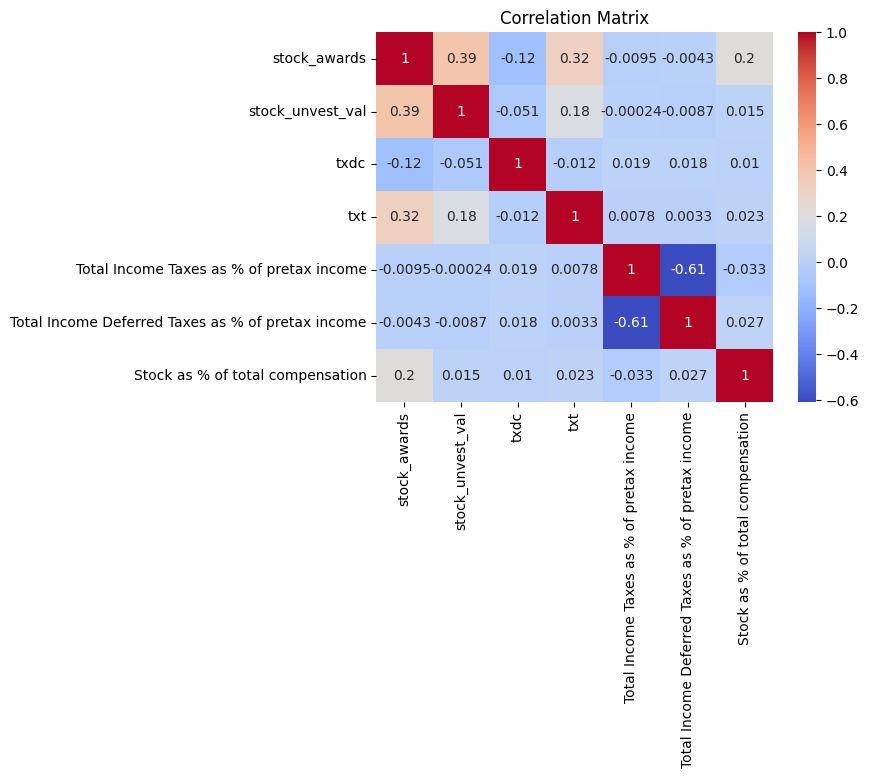

In [ ]:
# Correlation Matrix
corr_query = merged_data[['stock_awards', 'stock_unvest_val', 'txdc',
                          'txt', 'Total Income Taxes as % of pretax income',
                          'Total Income Deferred Taxes as % of pretax income',
                          'Stock as % of total compensation']]
plt.figure()
# Create heatmap
sns.heatmap(corr_query.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The above heatmap provides us with initial insights into correlation between the various independent and dependent variables. It is surprising to see that there is very little correlation between stock_awards and total income taxes and total income deferred taxes. I expected there to be a strong relationshp between these two variables since stocks often make up a large portion of a company's income and thereby taxes.

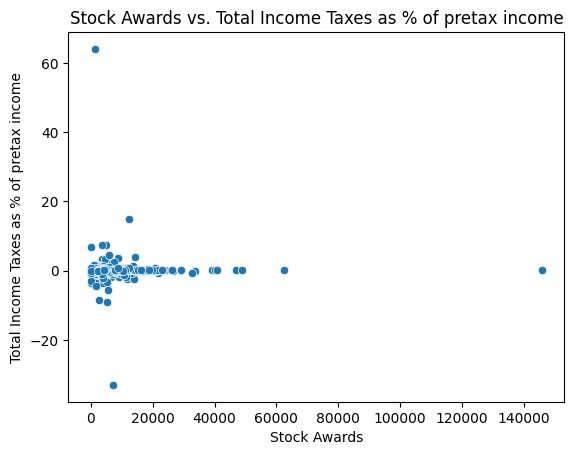

In [ ]:
# Scatterplot for stock awards vs. Total Income Taxes as % of pretax income
plt.figure()
sns.scatterplot(data=stock_query, x='stock_awards', y='Total Income Taxes as % of pretax income')
plt.xlabel('Stock Awards')
plt.ylabel('Total Income Taxes as % of pretax income')
plt.title('Stock Awards vs. Total Income Taxes as % of pretax income')
plt.show()

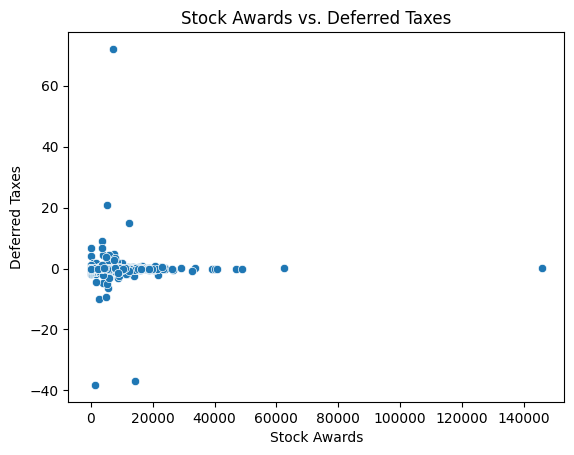

In [ ]:
# Scatterplot for stock awards vs. Deferred Taxes
plt.figure()
sns.scatterplot(data=stock_query, x='stock_awards', y='Total Income Deferred Taxes as % of pretax income')
plt.xlabel('Stock Awards')
plt.ylabel('Deferred Taxes')
plt.title('Stock Awards vs. Total Income Deferred Taxes as % of pretax income')
plt.show()

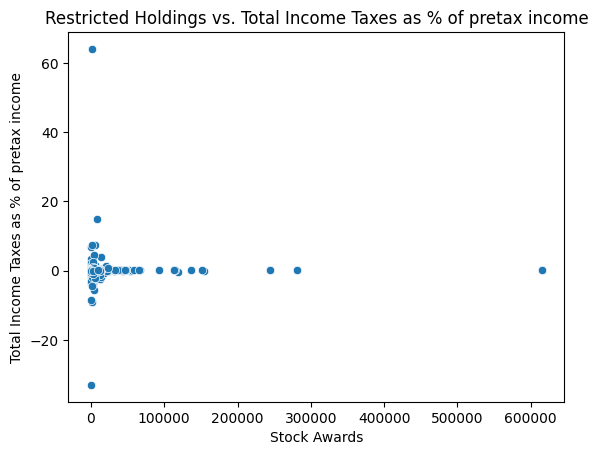

In [ ]:
# Scatterplot for restricted holdings vs. Total Income Taxes as % of pretax income
plt.figure()
sns.scatterplot(data=stock_query, x='stock_unvest_val', y='Total Income Taxes as % of pretax income')
plt.xlabel('Stock Awards')
plt.ylabel('Total Income Taxes as % of pretax income')
plt.title('Restricted Holdings vs. Total Income Taxes as % of pretax income')
plt.show()

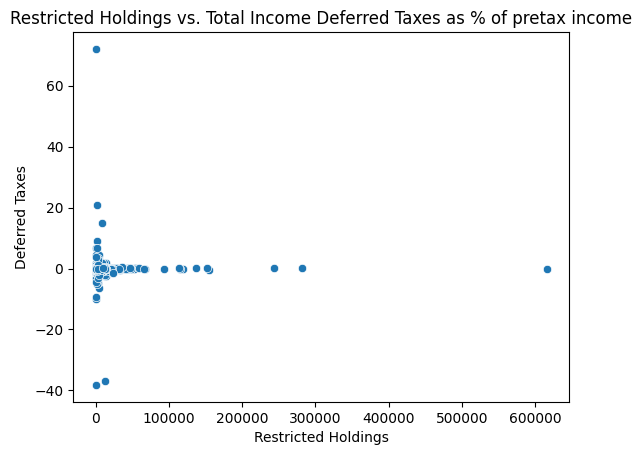

In [ ]:
# Scatterplot for restricted holdings vs. Deferred Taxes
plt.figure()
sns.scatterplot(data=stock_query, x='stock_unvest_val', y='Total Income Deferred Taxes as % of pretax income')
plt.xlabel('Restricted Holdings')
plt.ylabel('Deferred Taxes')
plt.title('Restricted Holdings vs. Total Income Deferred Taxes as % of pretax income')
plt.show()

The four scatterplots above all have very similar shapes where they look to be centered around 0 with one outlier that is very far to the right. There are some outliers above and below where the data is centered, however, most of the data looks to be centered around the mean fairly well.

In [ ]:
# Regression Analysis for Stock Awards vs. Total Income Taxes as % of pretax income
x = stock_query['stock_awards']
y = stock_query['Total Income Taxes as % of pretax income']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                                       OLS Regression Results                                       
Dep. Variable:     Total Income Taxes as % of pretax income   R-squared:                       0.000
Model:                                                  OLS   Adj. R-squared:                 -0.001
Method:                                       Least Squares   F-statistic:                    0.1043
Date:                                      Mon, 31 Mar 2025   Prob (F-statistic):              0.747
Time:                                              22:01:19   Log-Likelihood:                -2585.7
No. Observations:                                      1152   AIC:                             5175.
Df Residuals:                                          1150   BIC:                             5185.
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

The large p-value tells us that stock_awards are statistically insignificant when looking at total income taxes as a percentage of pretax income.

In [ ]:
# Regression Analysis for Stock Awards vs. Total Income Deferred Taxes as % of pretax income
x = stock_query['stock_awards']
y = stock_query['Total Income Deferred Taxes as % of pretax income']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                                            OLS Regression Results                                           
Dep. Variable:     Total Income Deferred Taxes as % of pretax income   R-squared:                       0.000
Model:                                                           OLS   Adj. R-squared:                 -0.001
Method:                                                Least Squares   F-statistic:                   0.02158
Date:                                               Mon, 31 Mar 2025   Prob (F-statistic):              0.883
Time:                                                       22:02:13   Log-Likelihood:                -2845.1
No. Observations:                                               1152   AIC:                             5694.
Df Residuals:                                                   1150   BIC:                             5704.
Df Model:                                                          1                                         
Covariance

The large p-value tells us that stock_awards are statistically insignificant when looking at total income deferred taxes as a percentage of pretax income.

In [ ]:
# Regression Analysis for Restricted Holdings vs. Total Income Taxes as % of pretax income
x = stock_query['stock_unvest_val']
y = stock_query['Total Income Taxes as % of pretax income']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                                       OLS Regression Results                                       
Dep. Variable:     Total Income Taxes as % of pretax income   R-squared:                       0.000
Model:                                                  OLS   Adj. R-squared:                 -0.001
Method:                                       Least Squares   F-statistic:                 6.542e-05
Date:                                      Mon, 31 Mar 2025   Prob (F-statistic):              0.994
Time:                                              22:02:56   Log-Likelihood:                -2585.8
No. Observations:                                      1152   AIC:                             5176.
Df Residuals:                                          1150   BIC:                             5186.
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

The large p-value tells us that stock_unvest_val is statistically insignificant when looking at total income taxes as a percentage of pretax income.

In [ ]:
# Regression Analysis for Restricted Holdings vs. Total Income Deferred Taxes as % of pretax income
x = stock_query['stock_unvest_val']
y = stock_query['Total Income Deferred Taxes as % of pretax income']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                                            OLS Regression Results                                           
Dep. Variable:     Total Income Deferred Taxes as % of pretax income   R-squared:                       0.000
Model:                                                           OLS   Adj. R-squared:                 -0.001
Method:                                                Least Squares   F-statistic:                   0.08763
Date:                                               Mon, 31 Mar 2025   Prob (F-statistic):              0.767
Time:                                                       22:03:17   Log-Likelihood:                -2845.1
No. Observations:                                               1152   AIC:                             5694.
Df Residuals:                                                   1150   BIC:                             5704.
Df Model:                                                          1                                         
Covariance

The large p-value tells us that stock_unvest_val is statistically insignificant when looking at total income deferred taxes as a percentage of pretax income.

In [8]:
# Look at summary stats for companies in the top 1% of stock awards
top_one_percent = stock_query[stock_query['stock_awards'] >= stock_query['stock_awards'].quantile(0.99)]
top_one_percent.describe()

,gvkey,stock_awards,stock_unvest_val,txdc,txt,Total Income Taxes as % of pretax income,Total Income Deferred Taxes as % of pretax income,Stock as % of total compensation
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,53203.000000,47746.753667,75392.528000,-572.702833,3324.785500,0.108476,-0.103984,1.384306
std,63648.461374,32611.416071,79096.374542,2036.595982,6380.953868,0.276522,0.294977,1.709969
min,1690.000000,26230.870000,4696.619000,-6059.000000,-723.000000,-0.717262,-0.850198,0.738453
25%,12148.500000,31903.587250,20174.340250,-572.750000,97.293250,0.125187,-0.085986,0.780997
50%,14091.500000,39656.716000,50668.448000,-33.010000,694.075500,0.209116,-0.045865,0.891025
75%,118154.500000,47476.794500,98516.498250,25.539500,1698.750000,0.229281,0.061269,0.939856
max,171007.000000,145875.000000,281167.720000,2600.000000,16950.000000,0.305910,0.236385,6.788020


It is interesting to see how the mean for stock_awards changes from 6 million dollars overall to 47 million dollars when we look at the top 1%. This shows us that the outliers come from the top 1% which skews this data heavily.

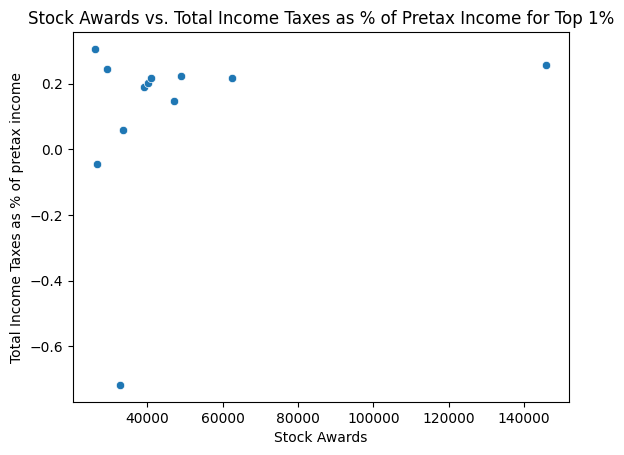

In [9]:
# Create total income tax scatterplot for top 1% of companies
plt.figure()
sns.scatterplot(data=top_one_percent, x='stock_awards', y='Total Income Taxes as % of pretax income')
plt.xlabel('Stock Awards')
plt.ylabel('Total Income Taxes as % of pretax income')
plt.title('Stock Awards vs. Total Income Taxes as % of Pretax Income for Top 1%')
plt.show()

The relationship for the scatterplot for stock awards to total income taxes is hard to tell as it does not look clearly correlated one way or another.

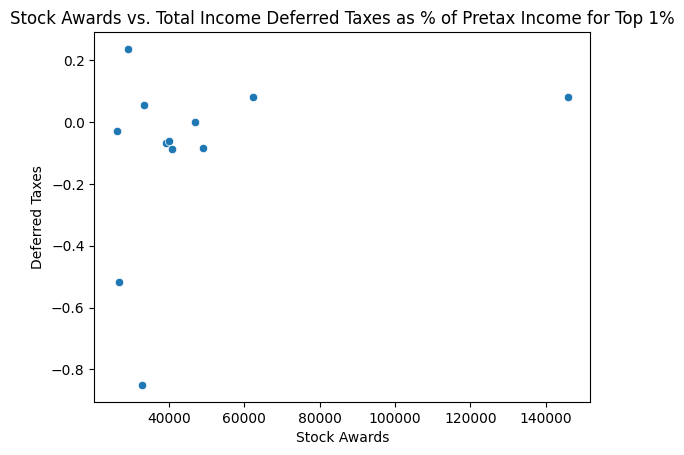

In [11]:
# Scatterplot for stock awards vs. Deferred Taxes for Top 1%
plt.figure()
sns.scatterplot(data=top_one_percent, x='stock_awards', y='Total Income Deferred Taxes as % of pretax income')
plt.xlabel('Stock Awards')
plt.ylabel('Deferred Taxes')
plt.title('Stock Awards vs. Total Income Deferred Taxes as % of Pretax Income for Top 1%')
plt.show()

Similarly, this scatterplot still does not look to have a very strong correlation between stock awards and deferred taxes which may suggest that even amongst the top 1%, there is not a strong relationship between these two variables.